# Tutorial 2 (Week 2) - Descriptive Statistics and Hypothesis Testing

## Learning Objectives

After completing this tutorial, you should be able to:

+ Manipulate NumPy and Pandas data structures for statistics computation
  + Group the dataset by variable values
  + Filter the dataset for specific variable values
+ Compute descriptive statistics for a dataset
  + Compute statistics on arrays, Series, and DataFrame
  + Apply statistical measures for decision making
+ Fit a probability distribution to a dataset and estimate the parameters using SciPy
+ Perform hypothesis testing using SciPy

# Preface: Handling Data in Pandas and NumPy

In Tutorial 1, we have used Pandas DataFrames and NumPy arrays in creating visualizations. We will now look at these data structures in more details so that we can perform more advanced operations with our data.

_Tips:_ Throughout the tutorial, we will encounter various functions and properties in Pandas and NumPy. It is recommended that you make it a habit to look up the documentation (API reference and usage examples) of those you are not yet familiar with. This way, you form a better understanding of how you can use them in future, beyond the example problems in this tutorial.

In Jupyter Notebook, the references are conveniently linked under the `Help` menu.

In [26]:
import numpy as np
import pandas as pd

## NumPy Arrays

NumPy is a fundamental package for scientific computing in Python. The main object in NumPy is `ndarray`, also known by the alias `array`. 

Numpy `array` is a table of elements (usually numbers), which is:
- _Homogeneous_: elements are all of the same type;
- _Multi-dimensional_: elements can be arranged into more than one __axes__;
- _Indexed_: elements are addressable by a tuple of integers, one on each axis.

The following image ([source](https://predictivehacks.com/tips-about-numpy-arrays/)) illustrates the array structure.

<img src="https://predictivehacks.com/wp-content/uploads/2020/08/numpy_arrays-1024x572.png" width="500">

Note that `numpy.array` is not the same as the Standard Python Library class `array.array`, which only handles one-dimensional arrays.

Sample basic operations on numpy arrays are given below. Try running the codes and make sure you understand the output. You can go to [NumPy quickstart](https://numpy.org/doc/stable/user/quickstart.html) for more examples and practice.

There are various ways to __create arrays__.

In [27]:
np.array((1,2,3,4,5))

array([1, 2, 3, 4, 5])

In [28]:
# One of many ways to create an array
a = np.arange(24).reshape(4, 3, 2)
a

array([[[ 0,  1],
        [ 2,  3],
        [ 4,  5]],

       [[ 6,  7],
        [ 8,  9],
        [10, 11]],

       [[12, 13],
        [14, 15],
        [16, 17]],

       [[18, 19],
        [20, 21],
        [22, 23]]])

Take note of the array notation, and compare the above array display with the conceptual illustration to understand how it is represented in NumPy.

Some __properties:__

In [29]:
a.shape

(4, 3, 2)

In [30]:
a.ndim

3

In [31]:
a.size

24

There are several methods to create arrays with __initialized content__.

In [32]:
np.zeros( (3,5) )

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [33]:
np.full( (3,5), 0.25 )

array([[0.25, 0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25, 0.25]])

In [34]:
np.random.rand( 3, 5 )

array([[0.12535049, 0.08610582, 0.90425464, 0.45464822, 0.94104965],
       [0.79902814, 0.02190956, 0.8399814 , 0.78853886, 0.14672621],
       [0.00165116, 0.82747473, 0.65625591, 0.05362071, 0.61132453]])

__Indexing__ operation retrieves the array element at `index`. For multi-dimensional arrays, `index` is a comma-separated tuple with one component for each axis. A negative component means counting from the last element on the axis.

In [35]:
a[3,2,1]

23

In [36]:
a[3,-2,1]

21

__Slicing__ operation takes a range `start:stop` and returns a contiguous subset of array elements from `start` (_inclusive_) to `stop` (_exclusive_). Leaving `start` blank means slicing from the first element, while leaving `stop` blank means slicing until and including the last element.

The slicer can take an optional third argument, making it `start:stop:step`, to set the interval at which elements are included in the slice. A negative step reverses the direction of the stepping.

In [37]:
a[3,1:2,1]

array([21])

In [38]:
a[3,1:,1]

array([21, 23])

In [39]:
a[::2,:,1]

array([[ 1,  3,  5],
       [13, 15, 17]])

Conceptually, indexing returns an _element_ of the array, while slicing returns a _subset_ of the array. 

- A subset of an array is always another array. 

- An element of a 1D array is simply a value; an element of a 2D array is a 1D array, and so on. 

The indexing operation essentially narrows down to the element axis by axis, from axis 0 upwards. 

We can omit index components for higher axes (that is, stop narrowing down at one point) to retrieve all elements on remaining axes. This is equivalent to getting a complete slice of all remaining axes.

In [40]:
a[3,2]

array([22, 23])

In [41]:
a[3,2,:]

array([22, 23])

In [42]:
a[3]

array([[18, 19],
       [20, 21],
       [22, 23]])

In [43]:
a[3,:,:]

array([[18, 19],
       [20, 21],
       [22, 23]])

__Try this out:__ 

- Can you omit index components for lower axes (while specifying one or more higher axes index)? What elements do this retrieve? How is it different from slicing?

- Can you omit index components for arbitrary axes (while specifying other axes index)? What elements do this retrieve? How is it different from slicing?

In [44]:
# Try!

_Omitting index components of lower or arbitrary axes is disallowed as it will result in invalid indexing. 
E.g., how would one interpret `a[3,,1]`? Which element of `a[3]` to take? 
This is different from slicing, which has a standard interpretation of omitted components: empty start means 0, empty stop means end+1._

__Arithmetic operations__ on arrays are applied _element-wise_.

In [45]:
a

array([[[ 0,  1],
        [ 2,  3],
        [ 4,  5]],

       [[ 6,  7],
        [ 8,  9],
        [10, 11]],

       [[12, 13],
        [14, 15],
        [16, 17]],

       [[18, 19],
        [20, 21],
        [22, 23]]])

In [46]:
a*2

array([[[ 0,  2],
        [ 4,  6],
        [ 8, 10]],

       [[12, 14],
        [16, 18],
        [20, 22]],

       [[24, 26],
        [28, 30],
        [32, 34]],

       [[36, 38],
        [40, 42],
        [44, 46]]])

In [47]:
a < 7

array([[[ True,  True],
        [ True,  True],
        [ True,  True]],

       [[ True, False],
        [False, False],
        [False, False]],

       [[False, False],
        [False, False],
        [False, False]],

       [[False, False],
        [False, False],
        [False, False]]])

## Pandas Series and DataFrame

Pandas data table representation is __DataFrame__, a 2-dimensional data structure that can store data of different types in columns.

<img src = "https://pandas.pydata.org/pandas-docs/stable/_images/01_table_dataframe.svg" width="360">

Each column in a DataFrame is a __Series__, a one-dimensional labeled array consisting of _index_ (the axis label) and data values. A Series object has a single data type, which can be any supported [`dtype`](https://pandas.pydata.org/docs/user_guide/basics.html#basics-dtypes) (integers, strings, Python objects, etc.).

<img src = "https://pandas.pydata.org/pandas-docs/stable/_images/01_table_series.svg" width="120">

Sample basic operations on Series and DataFrame are given below. Try running the codes and make sure you understand the output. You can refer to [Pandas User Guide on data structures](https://pandas.pydata.org/docs/user_guide/dsintro.html) for more comprehensive guides.


### Series Operations

There are various ways to __create a Series__, such as from a NumPy array. We can specify the index or leave it as the default integer-based index.

In [48]:
s = pd.Series( np.random.rand(5), index=["a", "b", "c", "d", "e"] )
s

a    0.648831
b    0.425606
c    0.404456
d    0.294330
e    0.192722
dtype: float64

The concepts of indexing, slicing, and element-wise arithmetic operations also apply to Series, with some differences in application compared to NumPy arrays. Various [indexing methods](https://pandas.pydata.org/docs/user_guide/indexing.html) are supported.

__Indexing__ may use the index label or the integer position.

In [49]:
s['a']

0.6488310438031235

In [50]:
s['p']

KeyError: 'p'

In [51]:
d = {"a": 1}
d.get("a")

1

The `Series.get()` method avoids throwing error for invalid labels.

In [52]:
s.get('a', 123)

0.6488310438031235

In [53]:
s.get('f')  # What happens?

In [54]:
print( s.get('f') )

None


__Slicing__ with a range is applied on the Series data as well as the index.

In [55]:
s[2:4]

c    0.404456
d    0.294330
dtype: float64

In [56]:
s[::2]  # with step

a    0.648831
c    0.404456
e    0.192722
dtype: float64

As Series has index labels, slicing can be done using labels as well, but the behaviour is different. Try this out.

In [57]:
s['c':'e']

c    0.404456
d    0.294330
e    0.192722
dtype: float64

Unlike with NumPy arrays, __arbitrary non-contiguous slicing__ is possible. We can specify a list of labels.

In [58]:
# Note the inner [] for list notation
s[['a','b','d']]

a    0.648831
b    0.425606
d    0.294330
dtype: float64

We can also pass a boolean Series to pick elements corresponding to `True`-valued labels.

In [59]:
s > s.median()

a     True
b     True
c    False
d    False
e    False
dtype: bool

In [60]:
print( "Median:", s.median() )

# The > operation is applied element-wise, resulting in a Series of boolean values
s[ s > s.median() ]

Median: 0.4044557787452422


a    0.648831
b    0.425606
dtype: float64

### DataFrame Operations

Most of the time, the DataFrames we work with are the results of loading actual datasets. There are also other ways of __creating a DataFrame__, such as from a dict of Series.

In [61]:
d = {
    "one": pd.Series( np.random.rand(5), index=list('abcde') ),
    "two": pd.Series( ['Alice', 'Bob', 'Carol'], index=list('abc') )  # different length
}
# Observe how the different Series lengths are handled
df = pd.DataFrame(d)
df

,one,two
a,0.255558,Alice
b,0.168616,Bob
c,0.679456,Carol
d,0.817745,NaN
e,0.899642,NaN


__Select DataFrame columns__ by column name. The result is a Series, retaining the index. The column name is stored in the `name` attribute of the Series.

In [62]:
df["one"]

a    0.255558
b    0.168616
c    0.679456
d    0.817745
e    0.899642
Name: one, dtype: float64

__Select DataFrame rows__ by the row label using `df.loc`, or by the integer location using `df.iloc`. The result is also a Series, with the column names serving as index. The row label is stored in the `name` attribute of the Series.

In [63]:
df.loc['c']

one    0.679456
two       Carol
Name: c, dtype: object

In [64]:
df.iloc[2]

one    0.679456
two       Carol
Name: c, dtype: object

We can __add a new column__ to the DataFrame, e.g., from a Series. 

New columns are added at the end by default. `DataFrame.insert()` can be used to insert a column at a particular location.

In [65]:
df

,one,two
a,0.255558,Alice
b,0.168616,Bob
c,0.679456,Carol
d,0.817745,NaN
e,0.899642,NaN


In [66]:
df["flag"] = pd.Series( np.ones(5), index=list('abcde') )
df

,one,two,flag
a,0.255558,Alice,1.0
b,0.168616,Bob,1.0
c,0.679456,Carol,1.0
d,0.817745,NaN,1.0
e,0.899642,NaN,1.0


In [67]:
df.insert( 2, "three", df["flag"] - df["one"] )
df

,one,two,three,flag
a,0.255558,Alice,0.744442,1.0
b,0.168616,Bob,0.831384,1.0
c,0.679456,Carol,0.320544,1.0
d,0.817745,NaN,0.182255,1.0
e,0.899642,NaN,0.100358,1.0


We can also __set the value of an existing column__.

In [68]:
df["two"] = ['Alice', 'Bob', 'Carol', 'Dale', 'Eva']
df

,one,two,three,flag
a,0.255558,Alice,0.744442,1.0
b,0.168616,Bob,0.831384,1.0
c,0.679456,Carol,0.320544,1.0
d,0.817745,Dale,0.182255,1.0
e,0.899642,Eva,0.100358,1.0


__Delete a column__ with the Python `del` function. To remove the column but keep the data as a separate Series, __pop the column__ using `DataFrame.pop` instead.

In [69]:
del df["flag"]
df

,one,two,three
a,0.255558,Alice,0.744442
b,0.168616,Bob,0.831384
c,0.679456,Carol,0.320544
d,0.817745,Dale,0.182255
e,0.899642,Eva,0.100358


In [70]:
names = df.pop( "two" )

print( "Names:\n", names )
df

Names:
 a    Alice
b      Bob
c    Carol
d     Dale
e      Eva
Name: two, dtype: object


,one,three
a,0.255558,0.744442
b,0.168616,0.831384
c,0.679456,0.320544
d,0.817745,0.182255
e,0.899642,0.100358


__`DataFrame.assign()`__ is a useful method to create new columns (potentially derived from existing columns) in a copy of the data, leaving the original DataFrame untouched.

In [71]:
dfcopy = df.assign( four = df["one"] * df["three"] )
dfcopy

,one,three,four
a,0.255558,0.744442,0.190248
b,0.168616,0.831384,0.140185
c,0.679456,0.320544,0.217796
d,0.817745,0.182255,0.149038
e,0.899642,0.100358,0.090287


In [72]:
df

,one,three
a,0.255558,0.744442
b,0.168616,0.831384
c,0.679456,0.320544
d,0.817745,0.182255
e,0.899642,0.100358


We can __rename columns__ using a mapping. The index (row labels) can similarly be renamed. Note that the rename operation returns a new DataFrame.

In [73]:
dfcopy = dfcopy.rename( columns={"three" : "factor", "four" : "product"} )  # overwrite the existing DataFrame
dfcopy

,one,factor,product
a,0.255558,0.744442,0.190248
b,0.168616,0.831384,0.140185
c,0.679456,0.320544,0.217796
d,0.817745,0.182255,0.149038
e,0.899642,0.100358,0.090287


## Interoperability of Pandas and NumPy Data Structures

Most NumPy functions can be called directly on Series and DataFrame.

In [74]:
s

a    0.648831
b    0.425606
c    0.404456
d    0.294330
e    0.192722
dtype: float64

In [75]:
from math import *
exp(0.406531)

1.5015996902347246

In [76]:
np.exp( s )

a    1.913303
b    1.530517
c    1.498487
d    1.342227
e    1.212545
dtype: float64

In [77]:
df

,one,three
a,0.255558,0.744442
b,0.168616,0.831384
c,0.679456,0.320544
d,0.817745,0.182255
e,0.899642,0.100358


In [78]:
df.to_numpy()

array([[0.25555777, 0.74444223],
       [0.16861604, 0.83138396],
       [0.67945584, 0.32054416],
       [0.8177446 , 0.1822554 ],
       [0.89964157, 0.10035843]])

As we have seen in Tutorial 1, however, some functions will require NumPy arrays. We can __convert a Series or a DataFrame into a NumPy array__ using `Series.to_numpy` or `DataFrame.to_numpy` functions respectively. With heterogenous data, the lowest common type will have to be used.

In [79]:
s

a    0.648831
b    0.425606
c    0.404456
d    0.294330
e    0.192722
dtype: float64

In [80]:
s.to_numpy()

array([0.64883104, 0.42560573, 0.40445578, 0.29433023, 0.1927216 ])

In [81]:
df.to_numpy()

array([[0.25555777, 0.74444223],
       [0.16861604, 0.83138396],
       [0.67945584, 0.32054416],
       [0.8177446 , 0.1822554 ],
       [0.89964157, 0.10035843]])

Note that DataFrame is not intended to be a drop-in replacement for NumPy array as its indexing semantics and data model are quite different in places from an n-dimensional array.

In situations when we can use either Pandas or NumPy functions, we may consider factors such as the speed or memory consumption, as summarized in this [Pandas vs Numpy comparison table](https://www.knowledgehut.com/blog/data-science/pandas-vs-numpy#pandas-vs-numpy-[comparison-table]).

# Introduction to SciPy

The SciPy package contains various toolboxes dedicated to common issues in scientific computing. 

Although there are basic statistical functions (mean, mode, etc.) that can be applied directly to [Series](https://pandas.pydata.org/docs/reference/series.html#computations-descriptive-stats), [DataFrames](https://pandas.pydata.org/docs/reference/frame.html#computations-descriptive-stats), and [NumPy arrays](https://numpy.org/devdocs/reference/routines.statistics.html), the real repository for statistical functions is in [`scipy.stats`](https://docs.scipy.org/doc/scipy/reference/stats.html).

Let us work with a dataset next, to see how we can use the various packages to compute the statistics. We will also use some Matplotlib plotting functions along the way, so let's import that too.

In [82]:
import scipy.stats as stats

%matplotlib inline
import matplotlib.pyplot as plt

# Descriptive Statistics

For this tutorial, we will use the [food delivery time dataset](https://www.kaggle.com/datasets/bhanupratapbiswas/food-delivery-time-prediction-case-study).

__EXERCISE:__ 

Load the dataset from the file `food_delivery_time.xlsx`. What Pandas function should you use to read the Excel format?

In [83]:
# TODO
delivery = pd.read_excel( "food_delivery_time.xlsx" )
delivery.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min)
0,4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24
1,B379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33
2,5D6D,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26
3,7A6A,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21
4,70A2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30


__EXERCISE:__ 

Rename the column names to make them easier to handle:
```
Delivery_person_*   --> Rider_*
Delivery_location_* --> Customer_*
Type_of_order       --> Order_Type
Type_of_vehicle     --> Vehicle
Time_taken(min)     --> Time
```

In [84]:
# TODO
delivery = delivery.rename( columns={
"Delivery_person_ID" : "Rider_ID",
"Delivery_person_Age" : "Rider_Age",
"Delivery_person_Ratings" : "Rider_Ratings",
"Delivery_location_latitude" : "Customer_latitude",
"Delivery_location_longitude" : "Customer_longitude",
"Type_of_order" : "Order_Type",
"Type_of_vehicle" : "Vehicle",
"Time_taken(min)" : "Time"
} )
delivery.head()

,ID,Rider_ID,Rider_Age,Rider_Ratings,Restaurant_latitude,Restaurant_longitude,Customer_latitude,Customer_longitude,Order_Type,Vehicle,Time
0,4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24
1,B379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33
2,5D6D,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26
3,7A6A,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21
4,70A2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30


Upon inspection, the values in the Order and Vehicle columns contain trailing whitespace, which may hinder our work later on.

In [85]:
delivery["Order_Type"][0]

'Snack '

In [86]:
delivery["Vehicle"][0]

'motorcycle '

__EXERCISE:__ 

Trim the whitespace from all values in these two columns and store them back in the same DataFrame. Look up the function from `Series.str` package that you can use for this.

In [87]:
s = "   dfdf dfsdgs   "
s.strip()

'dfdf dfsdgs'

In [88]:
delivery["Order_Type"].str.strip()

0         Snack
1         Snack
2        Drinks
3        Buffet
4         Snack
          ...  
45588      Meal
45589    Buffet
45590    Drinks
45591     Snack
45592     Snack
Name: Order_Type, Length: 45593, dtype: object

In [89]:
# TODO
delivery["Order_Type"] = delivery["Order_Type"].str.strip()
delivery["Vehicle"] = delivery["Vehicle"].str.strip()

#alternatively, use the apply function
delivery["Vehicle"] = delivery["Vehicle"].apply(lambda x: x.strip())

In [90]:
delivery["Order_Type"][0]  # check after replacement

'Snack'

In [91]:
delivery["Vehicle"][0]  # check after replacement

'motorcycle'

__EXERCISE:__ 

What is the quickest way to find out (1) age range of all Riders, (2) mean Ratings across all orders, and (3) median of delivery time, directly on this DataFrame?

_Hint:_ You have done a similar task in Tutorial 1.

In [92]:
# TODO
delivery.describe()

,Rider_Age,Rider_Ratings,Restaurant_latitude,Restaurant_longitude,Customer_latitude,Customer_longitude,Time
count,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000
mean,29.544075,4.632367,17.017729,70.231332,17.465186,70.845702,26.294607
std,5.696793,0.327708,8.185109,22.883647,7.335122,21.118812,9.383806
min,15.000000,1.000000,-30.905562,-88.366217,0.010000,0.010000,10.000000
25%,25.000000,4.600000,12.933284,73.170000,12.988453,73.280000,19.000000
50%,29.000000,4.700000,18.546947,75.898497,18.633934,76.002574,26.000000
75%,34.000000,4.800000,22.728163,78.044095,22.785049,78.107044,32.000000
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,54.000000


The `DataFrame.describe` function is handy to quickly obtain basic statistics for all _numeric_ variables. These statistics are generated by excluding the missing values in the data, and the `count` value shows how many values in the column are used in the computation. As such, `count` is also a good indicator of the presence of missing values. 

Observe the output above and check whether this dataset have any missing values. (We will see how to deal with this situation when we learn Data Preprocessing later on in this course.)

Of course, we can obtain the standalone statistical measures (count, mean, std, and so on) as well. You can refer to the documentations for the functions.

__EXERCISE:__

Using standalone functions, obtain the answer to the three questions above.

In [93]:
delivery["Rider_Age"].max()

50

In [94]:
# TODO: Find the age range of all Riders
print( "(", delivery["Rider_Age"].min(), ",", delivery["Rider_Age"].max(), ")" )

( 15 , 50 )


In [95]:
# TODO: Find the mean Ratings across all orders
delivery["Rider_Ratings"].mean()

4.632366810694624

In [96]:
# TODO: Find the median of delivery time
delivery["Time"].median()

26.0

__Categorical variables__ are excluded from `DataFrame.describe`. As we would expect, measures like mean or median are not sensible for such variables. 

What statistics apply to categorical variables? These are count-related measures such as frequencies and proportion.

__EXERCISE:__ 

Find out the most popular order type in this dataset.

In [97]:
# TODO
delivery["Order_Type"].mode()

0    Snack
Name: Order_Type, dtype: object

Check if your answer is correct by comparing it with the counts of all variables below. 

Suppose we want to optimize the delivery operations. Looking at all the counts, is the mode useful to make a decision on which order type to focus on?

In [98]:
delivery["Order_Type"].value_counts()

Order_Type
Snack     11533
Meal      11458
Drinks    11322
Buffet    11280
Name: count, dtype: int64

_Just at a glance, the counts are quite close to each other. Making decisions solely based on the mode and focusing on optimizing only Snack orders might not help operations much!_

`scipy.stats` has a `describe` function as well, which works on _a single numeric variable_ and gives a slightly different set of statistical measures.

In [99]:
stats.describe( delivery["Rider_Ratings"] )

DescribeResult(nobs=45593, minmax=(1.0, 6.0), mean=4.632366810694624, variance=0.10739222445731587, skewness=-2.5328131336460165, kurtosis=16.42374563889402)

## Grouping and Filtering

Most of the time, statistics over the whole dataset do not give us a lot of meaningful information. For instance, not many useful conclusions can be drawn just by knowing the mean delivery time of all orders, given the variation in delivery distances and delivery vehicles. We would typically want to filter or group the dataset by values or conditions on the variables.

### Groupby

We can use `DataFrame.groupby()` function to split the dataset based on values of a specific variable. This is typically done to obtain aggregate statistics for the resulting groups (as what we want to do here), or other useful functionalities in the _split-apply-combine_ framework for data analysis as explained in [this Pandas guide](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html). 

The following image ([source](https://www.justintodata.com/pandas-groupby-with-python/)) illustrates the groupby mechanism.

<img src="https://www.justintodata.com/wp-content/uploads/2020/04/image-4.png">

Note that no actual splitting is done when the GroupBy object is created. The function only verifies that we have passed a valid mapping. The splitting is only done when we explicitly use some method on this object or extract some of its attributes, such as `groups`.

In [100]:
delivery

,ID,Rider_ID,Rider_Age,Rider_Ratings,Restaurant_latitude,Restaurant_longitude,Customer_latitude,Customer_longitude,Order_Type,Vehicle,Time
0,4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24
1,B379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33
2,5D6D,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26
3,7A6A,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21
4,70A2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30
...,...,...,...,...,...,...,...,...,...,...,...
45588,7C09,JAPRES04DEL01,30,4.8,26.902328,75.794257,26.912328,75.804257,Meal,motorcycle,32
45589,D641,AGRRES16DEL01,21,4.6,0.000000,0.000000,0.070000,0.070000,Buffet,motorcycle,36
45590,4F8D,CHENRES08DEL03,30,4.9,13.022394,80.242439,13.052394,80.272439,Drinks,scooter,16
45591,5EEE,COIMBRES11DEL01,20,4.7,11.001753,76.986241,11.041753,77.026241,Snack,motorcycle,26


In [101]:
delivery.groupby( ["Order_Type", "Vehicle"] ).mean("Rider_Ratings")

Rider_Age  Rider_Ratings  Restaurant_latitude  \
Order_Type Vehicle                                                           
Buffet     bicycle           28.533333       4.213333             8.300252   
           electric_scooter  29.538706       4.657370            16.568505   
           motorcycle        29.563760       4.622547            17.173804   
           scooter           29.632680       4.647384            16.846785   
Drinks     bicycle           29.875000       4.325000             5.027806   
           electric_scooter  29.900948       4.636670            16.578550   
           motorcycle        29.482547       4.629088            17.154522   
           scooter           29.536732       4.636941            17.110187   
Meal       bicycle           28.695652       4.347826             9.355332   
           electric_scooter  29.728903       4.642405            16.097872   
           motorcycle        29.633619       4.625988            17.016897   
           scooter           29.476240       4.636136            17.080775   
Snack      bicycle           31.500000       4.385714             3.098789   
           electric_scooter  29.564682       4.631314            16.538526   
           motorcycle        29.488799       4.627409            17.303181   
           scooter           29.409091       4.647458            16.786343   

                             Restaurant_longitude  Customer_latitude  \
Order_Type Vehicle                                                     
Buffet     bicycle                      35.658114          14.429798   
           electric_scooter             69.217354          17.227715   
           motorcycle                   70.710490          17.577018   
           scooter                      69.678176          17.300533   
Drinks     bicycle                      19.565552          18.846943   
           electric_scooter             69.521000          17.382844   
           motorcycle                   70.743708          17.463545   
           scooter                      70.159187          17.524653   
Meal       bicycle                      42.141344          13.838657   
           electric_scooter             67.047671          17.055607   
           motorcycle                   70.372653          17.431820   
           scooter                      70.410435          17.622004   
Snack      bicycle                      22.935009          18.590544   
           electric_scooter             68.629053          16.955864   
           motorcycle                   70.972460          17.670488   
           scooter                      69.748848          17.257927   

                             Customer_longitude       Time  
Order_Type Vehicle                                          
Buffet     bicycle                    56.830768  25.933333  
           electric_scooter           70.284393  24.256628  
           motorcycle                 71.036822  27.566945  
           scooter                    70.442824  24.526697  
Drinks     bicycle                    78.164646  25.562500  
           electric_scooter           71.537298  24.630137  
           motorcycle                 71.019690  27.395591  
           scooter                    70.837042  24.514771  
Meal       bicycle                    62.238512  27.260870  
           electric_scooter           68.717619  24.540084  
           motorcycle                 70.743111  27.712183  
           scooter                    71.236062  24.632115  
Snack      bicycle                    79.472047  26.571429  
           electric_scooter           69.334919  24.452772  
           motorcycle                 71.408553  27.743798  
           scooter                    70.361451  24.254494

We can also view data in a specific group using `get_group`.

In [102]:
delivery[(delivery["Vehicle"] == "motorcycle") & (delivery["Order_Type"] == "Drinks")]

,ID,Rider_ID,Rider_Age,Rider_Ratings,Restaurant_latitude,Restaurant_longitude,Customer_latitude,Customer_longitude,Order_Type,Vehicle,Time
2,5D6D,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26
29,2999999999999999848161405891222056600890935033...,COIMBRES02DEL03,31,4.8,11.022477,76.995667,11.052477,77.025667,Drinks,motorcycle,26
30,BFF,SURRES16DEL02,36,4.1,21.160437,72.774209,21.210437,72.824209,Drinks,motorcycle,22
48,A30B,CHENRES11DEL01,37,4.8,13.064181,80.236442,13.104181,80.276442,Drinks,motorcycle,26
53,7AC8,COIMBRES14DEL02,28,4.8,11.003681,76.975525,11.083681,77.055525,Drinks,motorcycle,36
...,...,...,...,...,...,...,...,...,...,...,...
45572,1A92,CHENRES12DEL03,39,4.6,12.972793,80.249982,13.062793,80.339982,Drinks,motorcycle,48
45574,90C5,MUMRES20DEL03,21,4.8,19.103249,72.846749,19.133249,72.876749,Drinks,motorcycle,22
45576,2BED,RANCHIRES02DEL02,34,4.2,0.000000,0.000000,0.130000,0.130000,Drinks,motorcycle,48
45581,51F0,SURRES02DEL03,20,4.9,21.186608,72.794136,21.216608,72.824136,Drinks,motorcycle,18


In [103]:
delivery.groupby( ["Order_Type", "Vehicle"] ).get_group( ("Drinks", "motorcycle") )

,ID,Rider_ID,Rider_Age,Rider_Ratings,Restaurant_latitude,Restaurant_longitude,Customer_latitude,Customer_longitude,Order_Type,Vehicle,Time
2,5D6D,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26
29,2999999999999999848161405891222056600890935033...,COIMBRES02DEL03,31,4.8,11.022477,76.995667,11.052477,77.025667,Drinks,motorcycle,26
30,BFF,SURRES16DEL02,36,4.1,21.160437,72.774209,21.210437,72.824209,Drinks,motorcycle,22
48,A30B,CHENRES11DEL01,37,4.8,13.064181,80.236442,13.104181,80.276442,Drinks,motorcycle,26
53,7AC8,COIMBRES14DEL02,28,4.8,11.003681,76.975525,11.083681,77.055525,Drinks,motorcycle,36
...,...,...,...,...,...,...,...,...,...,...,...
45572,1A92,CHENRES12DEL03,39,4.6,12.972793,80.249982,13.062793,80.339982,Drinks,motorcycle,48
45574,90C5,MUMRES20DEL03,21,4.8,19.103249,72.846749,19.133249,72.876749,Drinks,motorcycle,22
45576,2BED,RANCHIRES02DEL02,34,4.2,0.000000,0.000000,0.130000,0.130000,Drinks,motorcycle,48
45581,51F0,SURRES02DEL03,20,4.9,21.186608,72.794136,21.216608,72.824136,Drinks,motorcycle,18


As mentioned, however, we typically want to apply some operation to the GroupBy object.

__EXERCISE:__ 

Find the median delivery times for this dataset, grouped by vehicle types. 

In [104]:
# TODO
delivery.groupby( "Vehicle" )["Time"].median()

Vehicle
bicycle             26.0
electric_scooter    24.0
motorcycle          26.0
scooter             24.0
Name: Time, dtype: float64

### Filtering Rows

Another useful operation is filtering rows, which is usually done as an indexing operation as we learned previously. We specify as index, a condition involving the values in certain column, e.g.:

- `delivery["Vehicle"] == "scooter"` or
- `delivery["Rider_Age"] > 25`

These are arithmetic expressions which will be evaluated element-wise on the columns `delivery["Vehicle"]` or `delivery["Rider_Age"]`, resulting in a Series of boolean values: `True` for rows fulfilling the condition and `False` otherwise. Indexing `delivery` using this boolean Series will select only rows corresponding to `True` values.

__EXERCISE:__ 

An order just came in and we are looking for riders on scooters to assign it to. How many riders can we choose from?

_Hint:_ After filtering, what is the column we should be looking at? What Series function can you use to obtain the unique count?

In [105]:
# TODO
scooters = delivery[ delivery["Vehicle"] == "scooter" ]
scooters["Rider_ID"].nunique()

1316

__EXERCISE:__ 

How many of these scooter riders have achieved ratings higher than the median of this group?

In [106]:
# TODO
goodScooters = scooters[ scooters["Rider_Ratings"] > scooters["Rider_Ratings"].median() ]
goodScooters["Rider_ID"].nunique()

1227

__EXERCISE:__ 

What is the highest ratings that scooter riders have achieved? Show the IDs of all scooter riders who have achieved it.

In [107]:
# TODO
maxScooters = scooters["Rider_Ratings"].max()
print( "Highest rating:", maxScooters )
scooters[ scooters["Rider_Ratings"] == maxScooters ]["Rider_ID"].unique()

Highest rating: 6.0


array(['JAPRES08DEL01', 'AGRRES13DEL02', 'MYSRES15DEL02',
       'BANGRES010DEL01', 'DEHRES18DEL02', 'SURRES02DEL02',
       'MYSRES06DEL02', 'RANCHIRES06DEL02', 'BHPRES08DEL03',
       'ALHRES08DEL03', 'KNPRES16DEL02', 'MUMRES20DEL01', 'VADRES09DEL02',
       'KNPRES03DEL03', 'KOLRES06DEL02', 'CHENRES14DEL02',
       'VADRES17DEL01', 'KNPRES19DEL03', 'INDORES11DEL03'], dtype=object)

As a final exercise in this section, suppose we pick any scooter rider who have achieved ratings higher than the median to deliver all orders. Consider how we may satisfactorily estimate a delivery time to inform the customers.

__EXERCISE:__

First, let's try to obtain the summary statistics for the delivery time of this group.

In [108]:
# TODO
goodScooters["Time"].describe()

count    6371.000000
mean       22.323026
std         7.513496
min        10.000000
25%        16.000000
50%        22.000000
75%        27.000000
max        49.000000
Name: Time, dtype: float64

If the mean and median (equal to the 50% percentile) values are close, we might think it would be a reasonable estimate to provide. But what will happen if we give this estimate to all customers? Clearly about half the customers would be upset because they would not receive their food within this time.

So should we take the maximum delivery time, and provide a guaranteed delivery time of `max`? We may soon lose many customers as most people would not want to wait that long for their food.

Instead, looking at the delivery time distribution, using a histogram, may guide our estimate better.

__EXERCISE:__

Use the `Series.hist` function to draw the histogram of delivery time.

<Axes: >

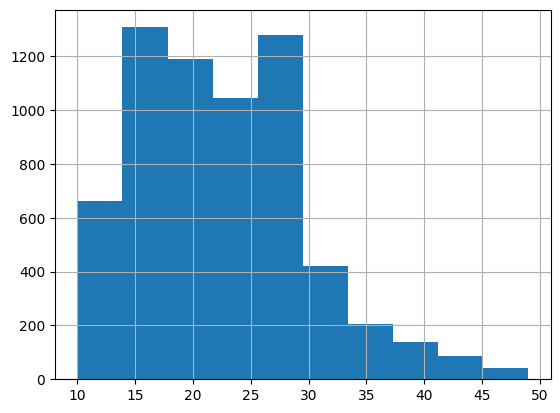

In [109]:
# TODO
goodScooters["Time"].hist()

Using the histogram, we can verify the time duration in which most orders can be delivered. On the rare occasions that it takes longer, it could be because the restaurants are overcrowded, or the traffic jams are worse than usual.

We could then determine a reasonable time range to provide to customers, and inform them that it might take longer in certain unexpected situations.

# Probability Distributions with Scipy

A _probability distribution_ describes phenomena that are influenced by random processes: naturally occurring random processes; or uncertainties caused by incomplete knowledge.

The outcomes of a random process are called a _random variable, X_. The _distribution function_ maps probabilities to the occurrences of X.

SciPy counts 104 continuous and 19 discrete distributions that can be instantiated in its `stats.rv_continuous` and `stats.rv_discrete` classes. Discrete distributions deal with countable outcomes, such as customers arriving at a counter. Continuous distributions compute the probability of occurrences between two outcomes or points on the x-axis, such as variations in height, temperature, or time.

Distributions related to engineering and technology, which attempt to model, for instance, the lifetime or time to failure of equipment, as well as in biology and pharmaceutics, have blossomed in recent years, driven by the fast increasing availability of sensor data and other large sources of quantifiable information.

## Normal Distribution

The normal distribution, also called the Gaussian distribution, is a continuous probability distribution that is symmetric around its mean. It is arguably the most famous distribution due to its mathematical properties and its ability to describe many natural phenomena. It is typically great for mapping population data, for example, household income distribution. 

The normal distribution is characterized by two parameters: 
- the _mean (μ)_, which represents the central tendency of the distribution; and
- the _standard deviation (σ)_, which measures the spread or dispersion of the data.
By knowing these two parameters, we can fully describe a normal distribution.

#### Distribution Fitting

Fitting a normal distribution to a dataset allows us to estimate these parameters from the dataset. The `norm.fit` function in `scipy.stats` takes an array-like object as input and returns the maximum likelihood estimates (MLE) for the mean and standard deviation of the underlying distribution.

Let us fit a normal distribution to our observed dataset of delivery time. To use the SciPy function, we need this data in NumPy array format.

__EXERCISE:__

Convert the delivery time data into a NumPy array. 

In [110]:
delivery["Time"]

0        24
1        33
2        26
3        21
4        30
         ..
45588    32
45589    36
45590    16
45591    26
45592    36
Name: Time, Length: 45593, dtype: int64

In [111]:
# TODO
samples = delivery["Time"].to_numpy()
samples

array([24, 33, 26, ..., 16, 26, 36], dtype=int64)

<Axes: ylabel='Count'>

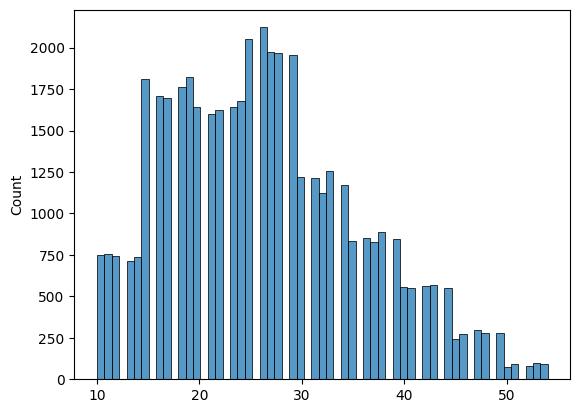

In [112]:
import seaborn as sb

sb.histplot(samples)

__EXERCISE:__

Now use the `norm.fit` function to fit the normal distribution to the data. Note that it returns two values, corresponding to the two parameters.

In [113]:
samples.std()

9.383703236190236

In [114]:
# TODO
mean, std = stats.norm.fit( samples )
print( "Mean:", mean )
print( "Std:", std )

Mean: 26.29460662821047
Std: 9.383703236190236


The mean is an estimator of the center of the distribution. The normal distribution distribution fit by SciPy should have the same center as the mean of the sample, as we have created a sample distribution.

__EXERCISE:__

Compute the mean of the sample array directly using NumPy, and verify that it has the same center.

In [115]:
# TODO
np.mean( samples )

26.29460662821047

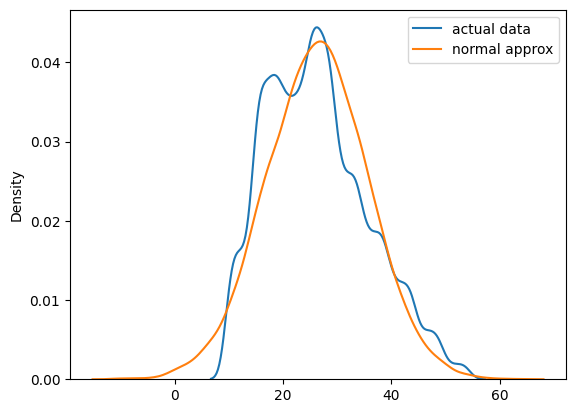

In [116]:
# comparing the kde plot of underlying data vs the normal approx

import matplotlib.pyplot as plt
fig, ax = plt.subplots()

#create normal distribution curve
sb.kdeplot(samples, ax=ax, label="actual data")

#create points following the approx normal distr to be plotted
normal_samples = np.random.normal(loc = mean, scale = std, size=10000)

#create normal distribution curve
sb.kdeplot(normal_samples, ax=ax, label="normal approx")

ax.legend()
plt.show()

Distribution of actual sample seems heavy tailed (skewed). A gamma distribution may work better. Refer here:https://en.wikipedia.org/wiki/Gamma_distribution

A gamma distribution has 3 parameters: 
- shape (how skewed)
- location (where should the distribution start, usually taken to be min(sample))
- scale (how spread out).

All 3 parameters can be estimated using scipy

In [117]:
shape, location, scale = stats.gamma.fit(samples)

print(shape, location, scale)


5.637497915905975 3.4389910391209026 4.054212428384098


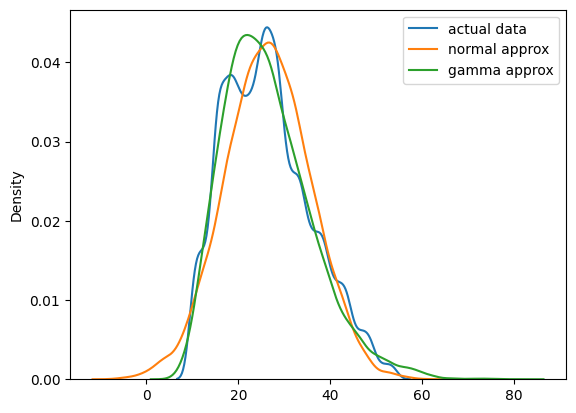

In [118]:
# comparing the kde plot of underlying data vs the normal approx vs gamma

import matplotlib.pyplot as plt
fig, ax = plt.subplots()

#create normal distribution curve
sb.kdeplot(samples, ax=ax, label="actual data")

#create points following the approx normal distr to be plotted
normal_samples = np.random.normal(loc = mean, scale = std, size=10000)

#create normal distribution curve
sb.kdeplot(normal_samples, ax=ax, label="normal approx")

#create gamma distribution curve
gamma_samples = stats.gamma.rvs(a=shape, loc=location, scale=scale, size=10000)
sb.kdeplot(gamma_samples, ax=ax, label="gamma approx")

ax.legend()
plt.show()

Suppose the underlying population mean is $\mu$. 

We can estimate $\mu$ from the sample (what we did above). Estimating a parameter using a sample is known as a sample or point estimate, and written as $\hat{\mu}$.

Denote $\hat{\mu}$ and $\hat{\sigma}^2$ as the sample estimates for the mean and variance, respectively. 

We have, by virtue of central limit theorem, $\frac{\hat{\mu} - \mu}{\hat{\sigma}/\sqrt{n}} \approx N(0, 1)$ (the standard normal distribution).

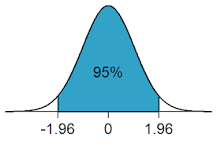

Since the 2.5% and 97.5% quantiles of $N(0,1)$ are -1.96 and 1.96 respectively, we can construct a $95\%$ $\text{confidence}$ interval for $\mu$, as $(\hat{\mu} -1.96 \hat{\sigma}/\sqrt{n}, \hat{\mu} +1.96 \hat{\sigma}/\sqrt{n})$. 


In general, a $\alpha \%$ $\text{confidence}$ interval is given by $(\hat{\mu} - q_{\alpha/2} \hat{\sigma}/\sqrt{n}, \hat{\mu} +q_{100-\alpha/2} \hat{\sigma}/\sqrt{n})$, where $q_\beta$ refers to the $\beta \%$ quantile of the standard normal distribution


In [119]:
mu_hat = np.mean( samples )
sigma_hat = np.std( samples ) / (len(samples))**0.5

from scipy import stats
stats.norm.interval(0.95, loc=mu_hat, scale=sigma_hat)

(26.20847289500122, 26.380740361419722)

In [120]:
# to verify the CI above

lower_bound = mu_hat - 1.96 * sigma_hat
upper_bound = mu_hat + 1.96 * sigma_hat

print(lower_bound, upper_bound)  # allow for some rounding errors as 1.96 is not the exact quantile :) 

26.208471312244573 26.380741944176368


# Hypothesis Testing using SciPy

A statistical test is a decision indicator. For instance, if we have two sets of observations, that we assume are generated from Gaussian processes, we can use a t-test to decide whether the means of two sets of observations are significantly different. 

Supppose we want to determine whether the average delivery time using motorcycles is significantly different from the mean delivery time of 26 minutes.

__EXERCISE:__

Obtain the NumPy array containing delivery time data for motorcycles.

In [121]:
# TODO
motorcycle_samples = delivery[ delivery["Vehicle"] == "motorcycle" ]["Time"].to_numpy()
motorcycle_samples

array([24, 26, 21, ..., 32, 36, 26], dtype=int64)

Consider the null hypothesis that the expected value (mean) of the motorcycles delivery time samples is equal to the given population mean. The `stats.ttest_1samp` function does two-sided test and returns the t-statistic and p-value.

__EXERCISE:__

Run the `ttest_1samp` function on the motorcycles delivery time data and given population mean. Let the significance value be 0.05. Can we reject the null hypothesis?

In [122]:
# TODO
stats.ttest_1samp( motorcycle_samples, 26 )  # Population mean is ~26 minutes as calculated previously.

TtestResult(statistic=27.059409957536303, pvalue=4.3597985712286377e-159, df=26434)

_As p-value <= 0.05, we reject the null hypothesis._

Now let us investigate whether the mean delivery time using motorcycles is significantly different from the mean delivery time using bicycles.

__EXERCISE:__

Obtain the NumPy array containing delivery time data for bicycles.

In [123]:
# TODO
bicycle_samples = delivery[ delivery["Vehicle"] == "bicycle" ]["Time"].to_numpy()
bicycle_samples

array([28, 37, 13, 18, 47, 29, 20, 26, 27, 20, 12, 23, 25, 30, 31, 22, 18,
       26, 39, 32, 24, 15, 26, 28, 28, 33, 17, 14, 12, 21, 25, 39, 17, 31,
       33, 10, 30, 15, 14, 33, 38, 36, 26, 18, 23, 21, 19, 11, 45, 29, 39,
       35, 21, 29, 29, 16, 28, 30, 43, 39, 25, 19, 15, 47, 37, 31, 39, 21],
      dtype=int64)

We can use the `stats.ttest_ind` function to do a two-sided test for the null hypothesis that the two independent samples have identical average (expected) values.

__EXERCISE:__

Run the `ttest_ind` function on the motorcycles delivery time data and the bicycle delivery time data. Let the significance value be 0.05. Can we reject the null hypothesis?

In [124]:
# TODO
stats.ttest_ind( motorcycle_samples, bicycle_samples, equal_var=False )  # We do not assume equal population variance

TtestResult(statistic=1.0483186188927398, pvalue=0.29823794169179335, df=67.37446070485312)

_As p-value > 0.05, we do not have sufficient evidence to reject the null hypothesis._